# DigiProf

DigiProf is a web application that utilizes machine learning to recognize numbers written by children, and vocalizing these numbers into sound using text-to-speech technology. The app is made to help children actively learn and recall numbers by vocalizing what they have written, thus instilling the concept of Autodidacticism or self-learning. We hope to instill a love for learning and curiosity for exploration in children that will guarantee quality education with long term self-teaching habits.

This project is developed by:

- A. P. Dumosmog
- K. M. Quirapas
- D. C. Roxas

This project is inspired by:
Sustainable Development Goals 4 — Quality Education

## 1. Importing the dataset and libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as sio
from scipy import optimize
from IPython.display import display, clear_output
from PIL import Image

import os
import glob 
from skimage import io
import skimage
import random

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

## 2. Data Preprocessing

.\data\2\image(84).jpg


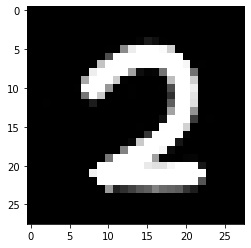

In [2]:
datasetpath = []
generalpath = r".\data"
classnames = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#Getting the images from the ./data folder
for index in range(10):
    indivpath = os.path.join(generalpath, classnames[index], "*")
    indivpath = glob.glob(indivpath)
    datasetpath.append(indivpath)

datasetpath = np.ravel(datasetpath)
#print(datasetpath)
#Transforming the images to matrices
dataset = []
for i in range(datasetpath.shape[0]):
    image = io.imread(datasetpath[i])
    
    #Convert to grayscale
    grayimage = skimage.color.rgb2gray(image)
    
    #Inverting the grayscale image
    for i in range(grayimage.shape[0]):
        for j in range(grayimage.shape[1]):
            grayimage[i][j] = 1 - grayimage[i][j]
            
    dataset.append(grayimage)

#Normalization
normdataset = []
for image in dataset:
    normimage = (image - np.min(image)) / (np.max(image) - np.min(image))
    normdataset.append(normimage)

#Print a random image from the dataset
rng = random.randint(0, len(normdataset)-1)
sample = normdataset[rng].reshape((28,28))
print(datasetpath[rng])
fig, ax = plt.subplots(1)
fig.set_figwidth(15)
ax.imshow(sample, cmap = 'gray')

In [3]:
#Creating the X feature and Y target matrices
X = []

for image in normdataset:
    X.append(np.ravel(image).reshape(28,28))
    

Y = np.genfromtxt("./data/labels.csv", dtype=np.int32, delimiter=",")

X = np.array(X)
Y = np.array(Y)
Yreshaped = Y.reshape(-1, 1)

#Encoding target vector Y using OneHotEncoder
ohe = OneHotEncoder()
y_hot = ohe.fit_transform(Yreshaped)

## 3. Exploratory Data Analysis

### 3.1 Dataset basic information

In [4]:
df = pd.DataFrame(X)
print("Sample pixels from the dataset\n")
print(df.head())

ValueError: Must pass 2-d input. shape=(200, 28, 28)

In [ ]:
print("Features matrix X basic information\n")
print(df.info())
print("X shape: "+str(X.shape))


In [ ]:
df2 = pd.DataFrame(Y)
print("Target vector Y basic information\n")
print(df2.info())
print("y_hot shape: "+str(y_hot.shape))

### 3.2 Distribution of Labels

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

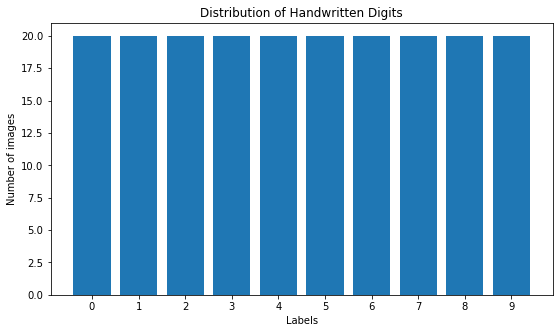

In [5]:
distrib = {}
for i in Y:
    if i not in distrib:
        distrib[i] = 1
    else:
        distrib[i] += 1
#plt.bar(distrib.keys(), distrib.values(), x="Labels", y="Number of images")

fig, ax = plt.subplots(figsize=(9,5))
bars = ax.bar(distrib.keys(), distrib.values())
ax.set_xticks(range(10))
ax.set_xlabel('Labels')
ax.set_ylabel('Number of images')
ax.set_title("Distribution of Handwritten Digits")
ax.bar_label(bars)

plt.show()

### 3.3 Pixel Intensity

In [6]:
df.describe()

NameError: name 'df' is not defined

## 4. Data Modeling

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(192, activation='sigmoid'),
    keras.layers.Dense(10)
])
mnist = keras.datasets.mnist
print(model.summary())
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0

loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optim = keras.optimizers.Adam(lr = .001)
metrics = ["accuracy"]

model.compile(loss=loss,optimizer=optim, metrics=metrics)

batch_size = 20
epochs = 18
model.fit(x_train,y_train, batch_size = batch_size, epochs=epochs, shuffle = True, verbose = 1)

model.evaluate(X,Y, batch_size = 20, verbose = 1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 192)               150720    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1930      
Total params: 152,650
Trainable params: 152,650
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/18
3000/3000 [==============================] - 2s 716us/step - loss: 0.3362 - accuracy: 0.9064
Epoch 2/18
3000/3000 [==============================] - 2s 716us/step - loss: 0.1603 - accuracy: 0.9530
Epoch 3/18
3000/3000 [==============================] - 2s 800us/step - loss: 0.1094 - accuracy: 0.96780s - l
Epoch 4/18
3000/3000 [==============================] - 2

[1.6953341960906982, 0.7450000047683716]

## 5. Data Testing

In [8]:
tf.saved_model.save(model,'./')
source = ml.TFLiteGCSModelSource.from_keras_model(model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./assets


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


#                         GRID SEARCH FOR PARAMETER OPTIMIZING
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
x_train = np.reshape(x_train, (60000,784))
svm = svm.SVC(C = 10, gamma = 0.001, kernel = 'linear')
svm.fit(x_train,y_train)

y_pred = svm.predict(X)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(metrics.accuracy_score(y_true = Y, y_pred = y_pred))

(60000, 28, 28) (60000,)
